<a href="https://colab.research.google.com/github/shahtisha/ML-mini-project/blob/main/ML_MINI_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/training set.csv")
test = pd.read_csv("/content/drive/MyDrive/testing set.csv")

# EDA

# Training dataset

In [ ]:
train.head()

,Year,Month,Day,Hour,Minute,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Wind Direction,Wind Speed,Fill Flag
0,2009,1,1,0,0,0,0,0,0,0.0,5.0,1010,75.34,106.15,0.499,346.1,3.1,0
1,2009,1,1,0,30,0,0,0,0,1.0,5.0,1010,80.81,112.28,0.490,346.1,3.1,0
2,2009,1,1,1,0,0,0,0,4,0.0,5.0,1010,78.27,118.50,0.482,347.9,3.2,0
3,2009,1,1,1,30,0,0,0,4,0.0,4.0,1010,78.27,124.78,0.478,347.9,3.1,0
4,2009,1,1,2,0,0,0,0,4,0.0,4.0,1010,76.45,131.12,0.475,350.0,3.0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175296 entries, 0 to 175295
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                175296 non-null  int64  
 1   Month               175296 non-null  int64  
 2   Day                 175296 non-null  int64  
 3   Hour                175296 non-null  int64  
 4   Minute              175296 non-null  int64  
 5   Clearsky DHI        175296 non-null  int64  
 6   Clearsky DNI        175296 non-null  int64  
 7   Clearsky GHI        175296 non-null  int64  
 8   Cloud Type          175296 non-null  int64  
 9   Dew Point           175296 non-null  float64
 10  Temperature         175296 non-null  float64
 11  Pressure            175296 non-null  int64  
 12  Relative Humidity   175296 non-null  float64
 13  Solar Zenith Angle  175296 non-null  float64
 14  Precipitable Water  175296 non-null  float64
 15  Wind Direction      175296 non-nul

In [ ]:
train.shape

(175296, 18)

Training dataset has 175296 rows and 18 columns


In [ ]:
train.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Clearsky DHI          0
Clearsky DNI          0
Clearsky GHI          0
Cloud Type            0
Dew Point             0
Temperature           0
Pressure              0
Relative Humidity     0
Solar Zenith Angle    0
Precipitable Water    0
Wind Direction        0
Wind Speed            0
Fill Flag             0
dtype: int64

Training dataset has zero null values hence no need of fillna() method

In [ ]:
train.duplicated().sum()

0

Training dataset has no dulpicated rows

In [ ]:
train.columns
column = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point',
       'Temperature', 'Pressure', 'Relative Humidity', 'Solar Zenith Angle',
       'Precipitable Water', 'Wind Direction', 'Wind Speed', 'Fill Flag']

Year


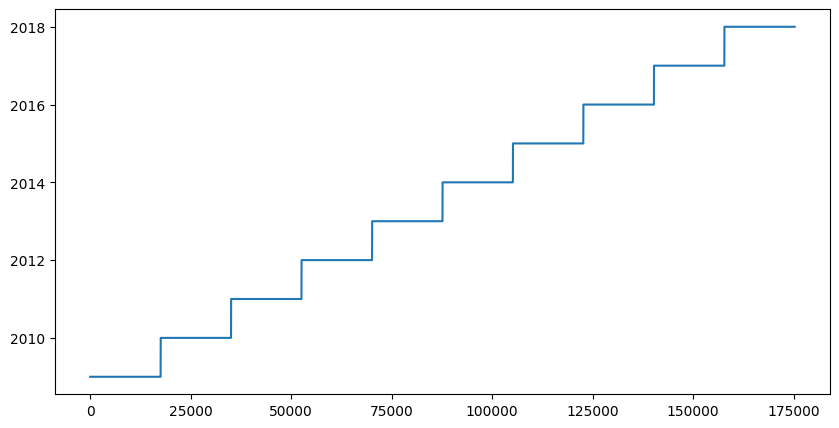

Month


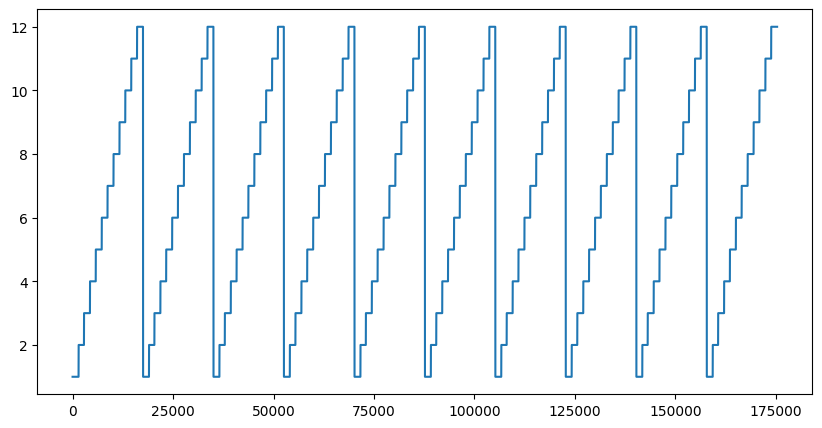

Day


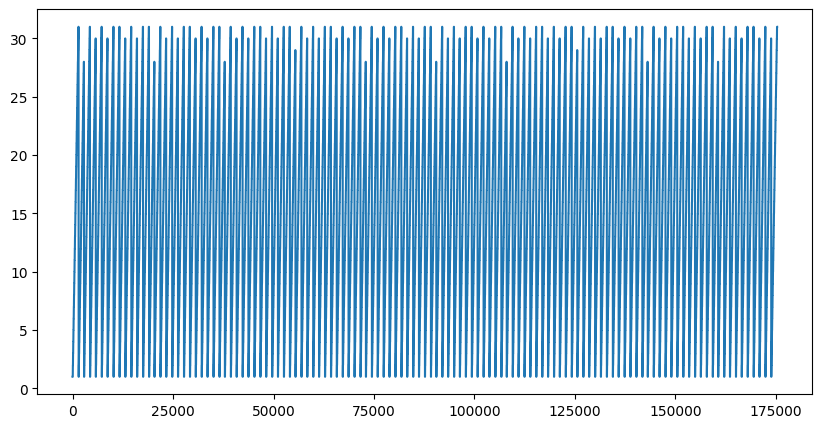

Hour


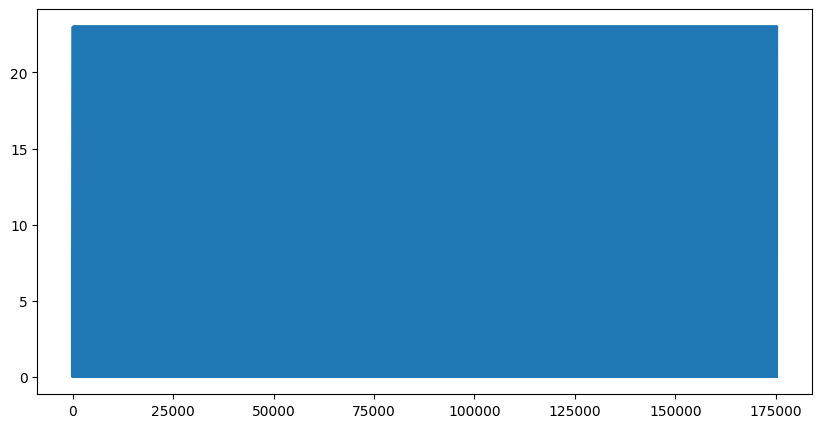

Minute


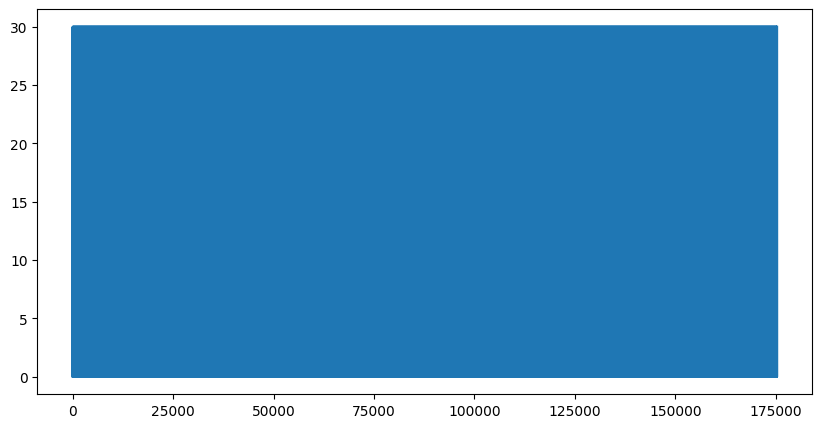

Clearsky DHI


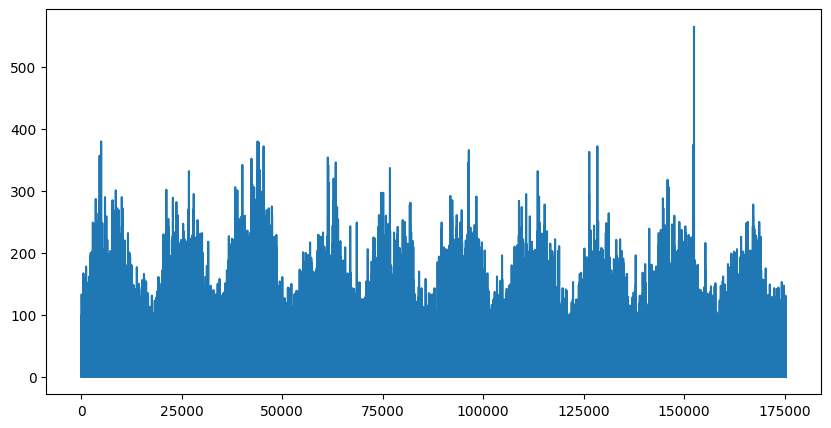

Clearsky DNI


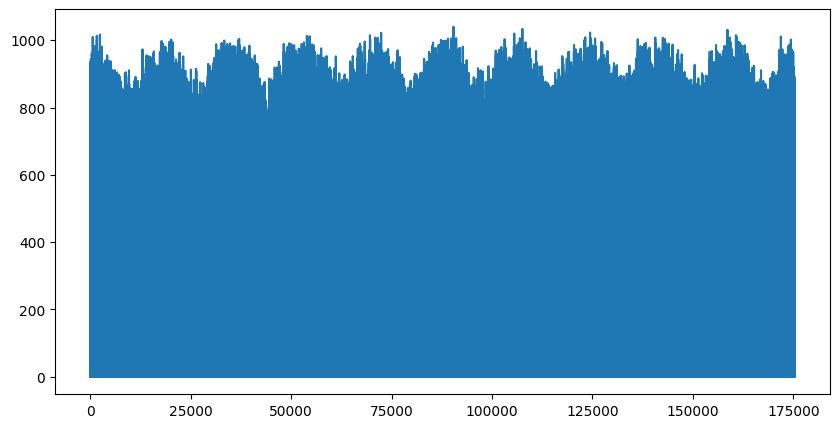

Clearsky GHI


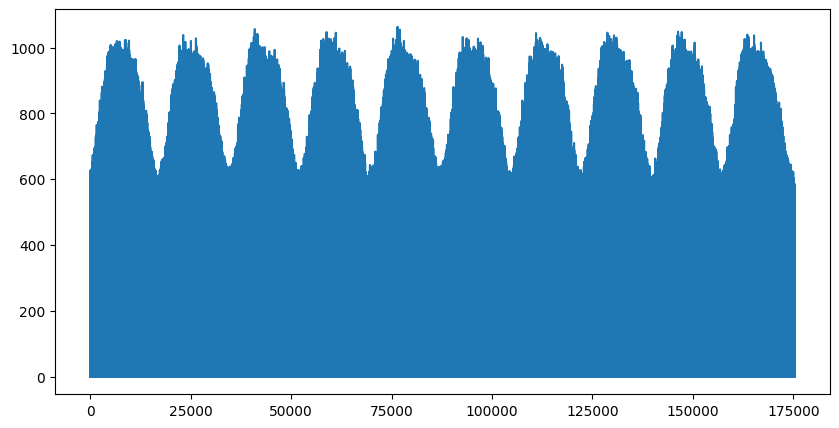

Cloud Type


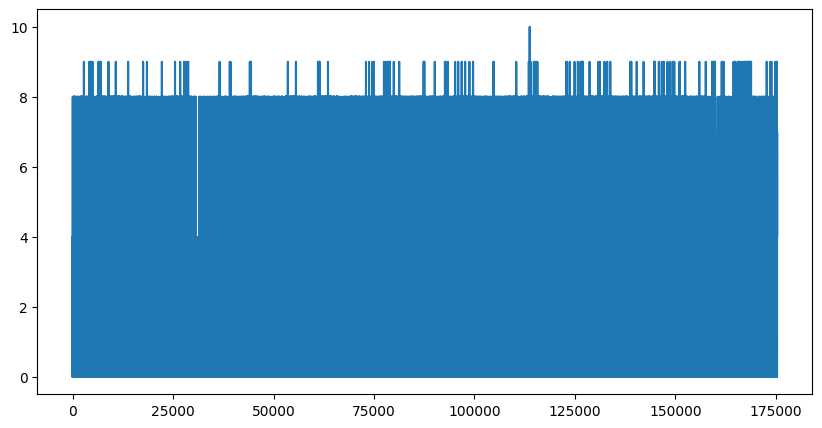

Dew Point


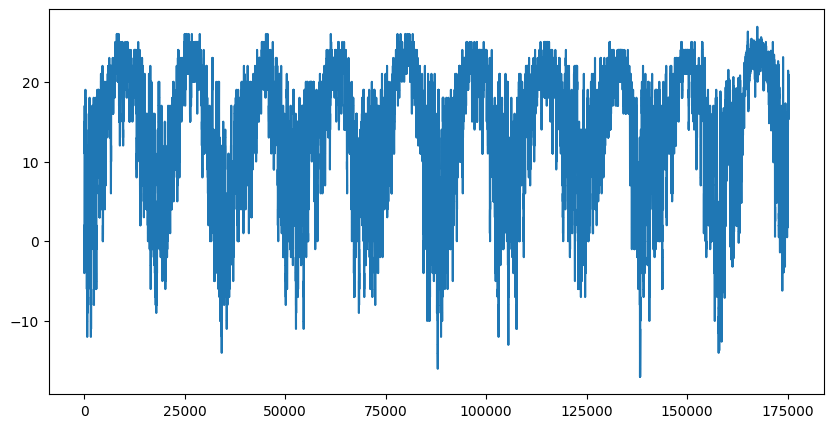

Temperature


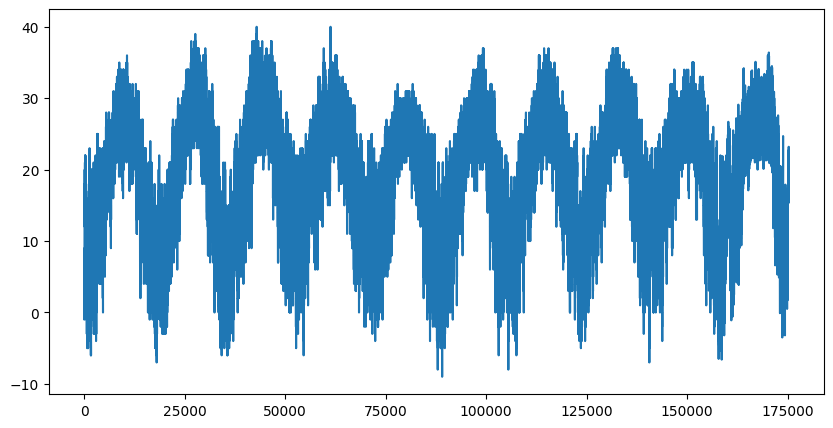

Pressure


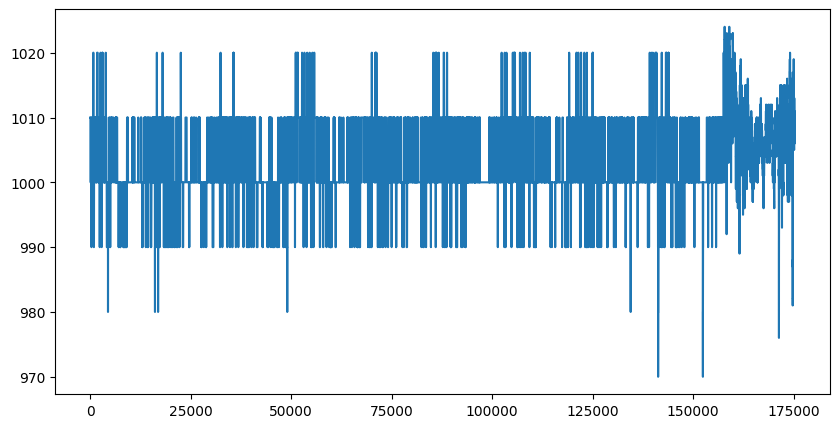

Relative Humidity


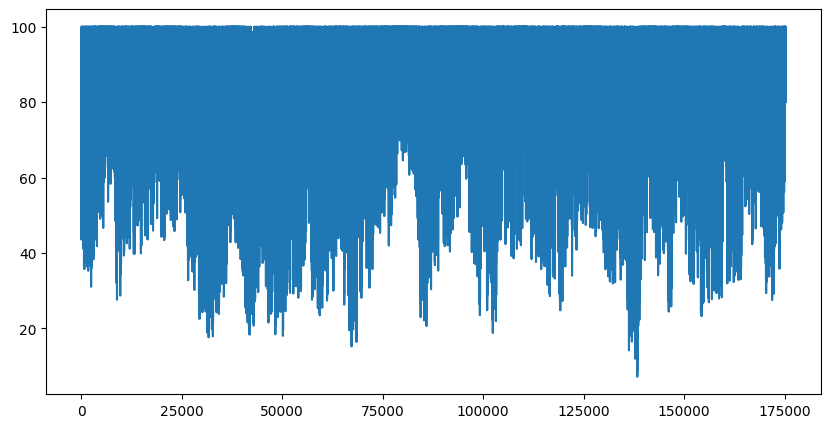

Solar Zenith Angle


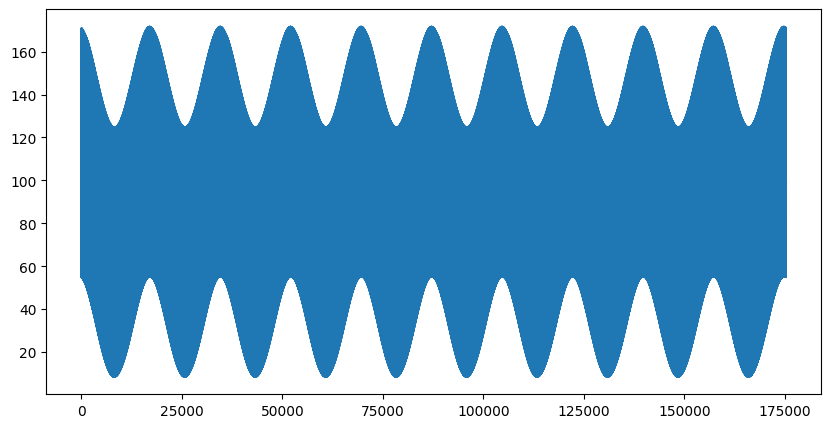

Precipitable Water


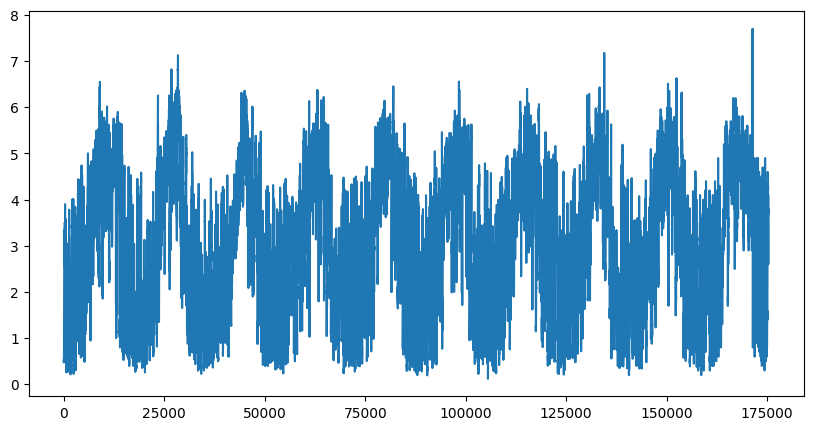

Wind Direction


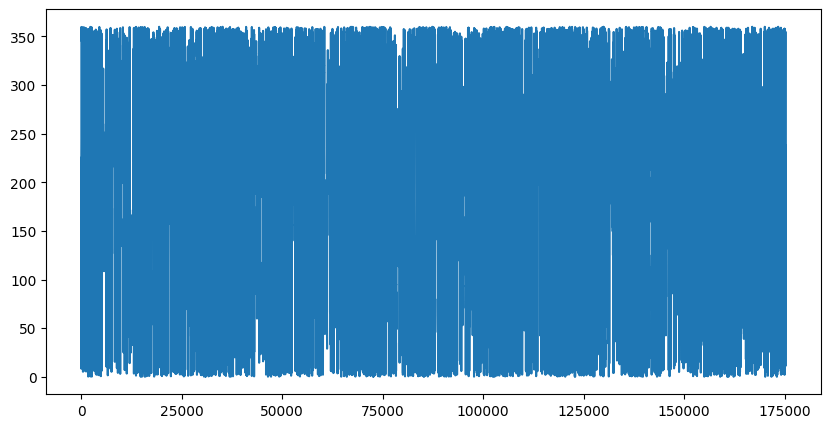

Wind Speed


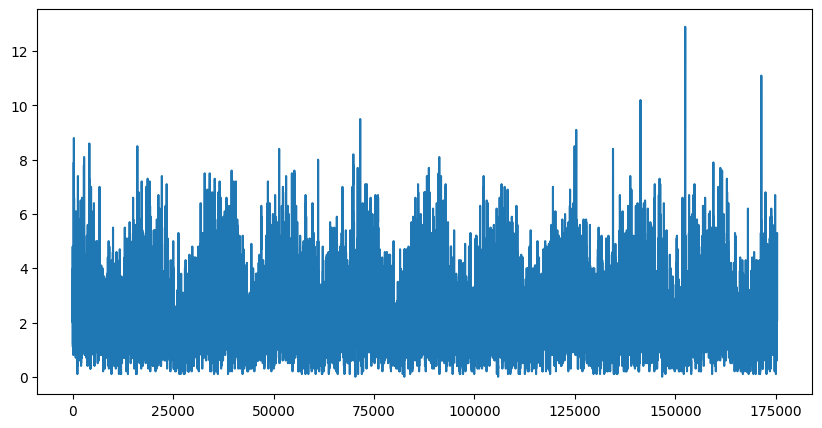

Fill Flag


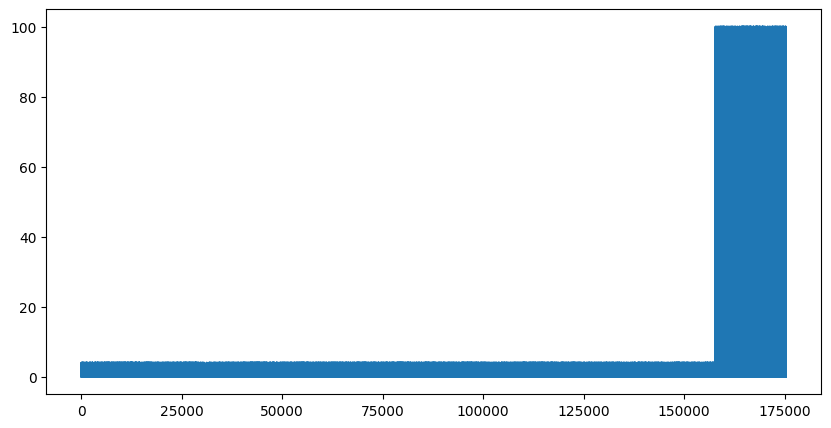

In [ ]:
for cols in column:
  print(cols)
  plt.figure(figsize = (10,5))
  train[cols].plot()
  plt.show()

# Visualization

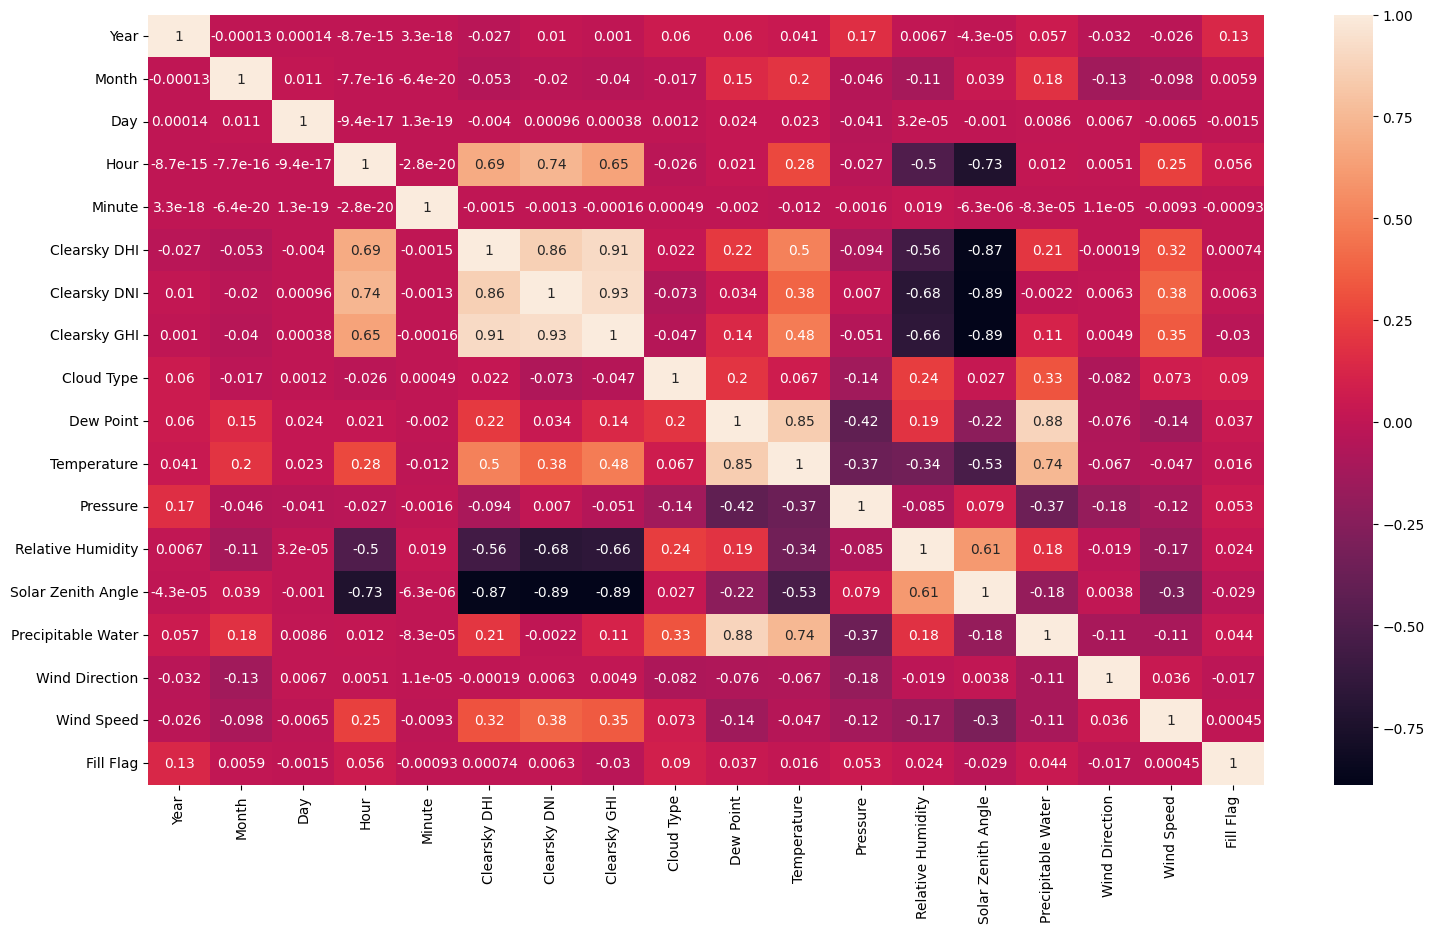

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(18,10))
cor = train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In a correlation heatmap, dark colors generally indicate a stronger correlation between the two features being compared. If two features are highly correlated, it may be redundant to include both of them in a ML model, as they may provide similar information.

Features that are highly correlated with the target variable are likely to be important predictors in a machine learning model.

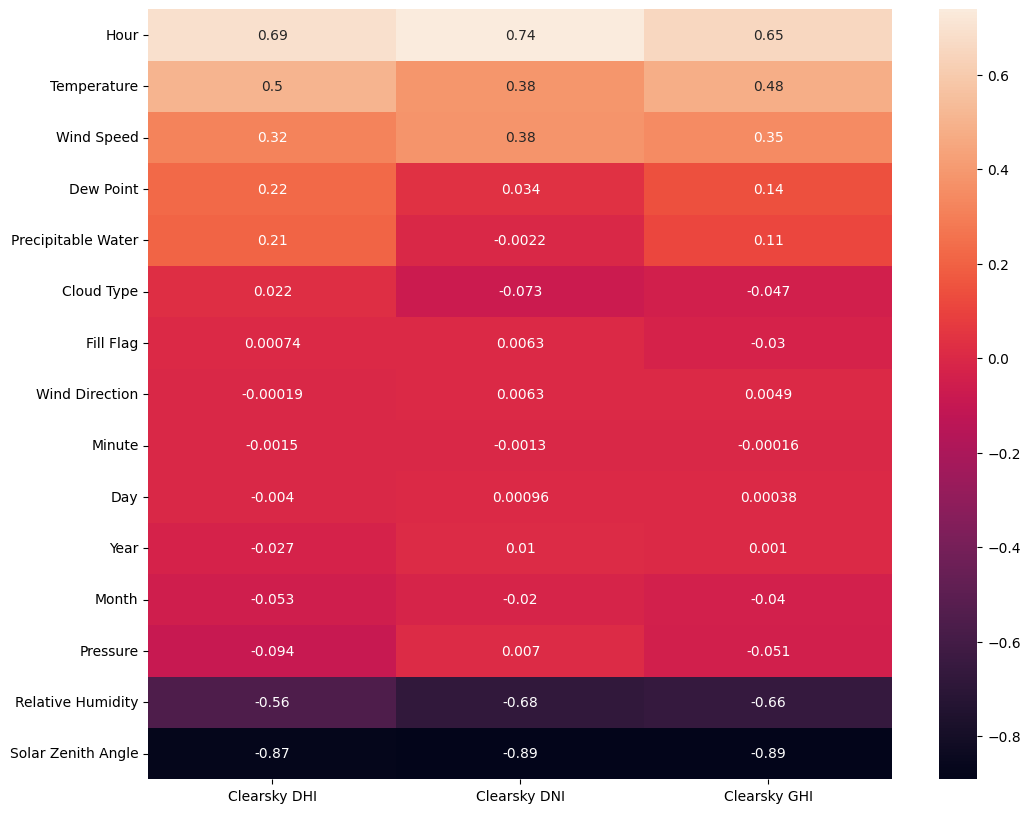

In [ ]:
#target features correlation
col = ['Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI']
plt.figure(figsize=(12, 10))
sns.heatmap(cor[col].drop(col).sort_values(col, ascending=False), annot=True)
plt.show()

# Testing dataset

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                17520 non-null  int64  
 1   Month               17520 non-null  int64  
 2   Day                 17520 non-null  int64  
 3   Hour                17520 non-null  int64  
 4   Minute              17520 non-null  int64  
 5   Cloud Type          17520 non-null  int64  
 6   Dew Point           17520 non-null  float64
 7   Temperature         17520 non-null  float64
 8   Pressure            17520 non-null  int64  
 9   Relative Humidity   17520 non-null  float64
 10  Solar Zenith Angle  17520 non-null  float64
 11  Precipitable Water  17520 non-null  float64
 12  Wind Direction      17520 non-null  int64  
 13  Wind Speed          17520 non-null  float64
 14  Fill Flag           17520 non-null  int64  
 15  Clearsky DHI        0 non-null      float64
 16  Clea

In [ ]:
test.shape

(17520, 18)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
data_scaled = scalar.fit_transform(train)
data_scaled

array([[0.        , 0.        , 0.        , ..., 0.96138889, 0.24031008,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.96138889, 0.24031008,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.96638889, 0.24806202,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.57777778, 0.20155039,
        0.57      ],
       [1.        , 1.        , 1.        , ..., 0.57222222, 0.1627907 ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.57222222, 0.1627907 ,
        0.        ]])

In [ ]:
train.iloc[:,5:8]

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
175291,51,555,168
175292,37,388,84
175293,15,115,18
175294,0,0,0


In [ ]:
features = data_scaled
targets = data_scaled[:,5]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, targets, test_size = 0.03)

In [ ]:
print('Training Features Shape:', x_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', x_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (170037, 18)
Training Labels Shape: (170037,)
Testing Features Shape: (5259, 18)
Testing Labels Shape: (5259,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr1 = dtr.fit(x_train, y_train)

In [ ]:
y_pred_test = dtr1.predict(x_test)
y_pred_train = dtr1.predict(x_train)

In [ ]:
from sklearn import metrics
mse1 = metrics.mean_squared_error(y_test, y_pred_test)
rmse = mse1**.5

In [ ]:
print("mse for train",mse1)
print("rmse for train",rmse)

mse for train 5.956620523854638e-09
rmse for train 7.717914565382697e-05


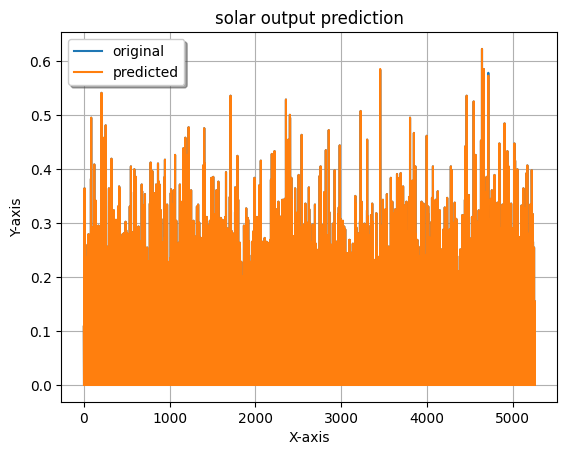

In [ ]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test, label="predicted")
plt.title("solar output prediction")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

[Text(0.5, 0.8333333333333334, 'x[5] <= 0.114\nsquared_error = 0.013\nsamples = 170037\nvalue = 0.094'),
 Text(0.25, 0.5, 'x[5] <= 0.042\nsquared_error = 0.001\nsamples = 101604\nvalue = 0.011'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[5] <= 0.24\nsquared_error = 0.006\nsamples = 68433\nvalue = 0.217'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

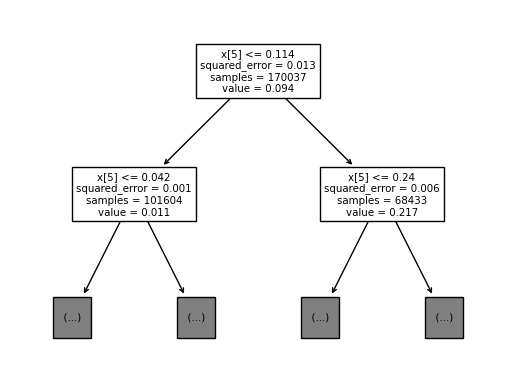

In [ ]:
from sklearn import tree
tree.plot_tree(dtr1, max_depth = 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf1 = rf.fit(x_train, y_train)

In [ ]:
prediction = rf1.predict(x_test)
mse = metrics.mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

8.500693149591996e-10
2.91559481917361e-05
